___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.cluster import KMeans
from apyori import apriori
%matplotlib inline

In [2]:
df_Groceries = pd.read_csv(r'C:\Users\iov\Desktop\Course Data Science\Module 8. Unsupervised learning\Groceries.csv', 
                           header=None)

#### Описова статистика файлу

In [3]:
df_Groceries.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,chocolate,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [4]:
df_Groceries

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Підготовка даних до використання 

In [5]:
lists = []
for i in range(0, df_Groceries.shape[0]):
    lists.append([str(df_Groceries.values[i,j]) for j in range(0, df_Groceries.shape[1])])

#### Використання моделі Apriori з мінімальними параметрами support - 0.0045, confidence - 0.2, lift - 3

In [6]:
association_rules = apriori(lists, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

#### Представлення результатів використання алгоритму визначення асоціативних зв’язків

In [7]:
top3 = {}
top2_pair = {}
for item in association_results:
    pair = item[0] 
    items = [x for x in pair]
    top3[items[0]] = item[1]
    top2_pair[items[0] + ':' + items[1]] = {"Support" :  item[1],
                                            "Confidence" : item[2][0][2],
                                            "Lift" : item[2][0][3]}
#     top2_pair[items[0] + ':' + items[1]] = item[2][0][2]   
    print("Rule: " + items[0] + " -> " + items[1] )

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: whipped/sour cream -> baking powder
Support: 0.004575495678698526
Confidence: 0.25862068965517243
Lift: 3.607850330154072
Rule: root vegetables -> beef
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
Rule: berries -> whipped/sour cream
Support: 0.009049313675648195
Confidence: 0.27217125382262997
Lift: 3.796885505454703
Rule: bottled beer -> liquor
Support: 0.004677173360447382
Confidence: 0.4220183486238532
Lift: 5.240594013529793
Rule: bottled beer -> red/blush wine
Support: 0.004880528723945094
Confidence: 0.253968253968254
Lift: 3.1537598204264876
Rule: flour -> sugar
Support: 0.00498220640569395
Confidence: 0.28654970760233917
Lift: 8.46311223504206
Rule: root vegetables -> herbs
Support: 0.007015760040671073
Confidence: 0.43124999999999997
Lift: 3.956477378731343
Rule: sliced cheese -> sausage
Support: 0.007015760040671073
Confidence: 0.2863070539419087
Lift: 3.047434930215013
Rule: whipped/sour cream -> baking powder
Support: 0.0045754

#### Топ-3 продуктів, що продаються (загальна кількість продажів без урахування наявності/відсутності асоціативних зв'язків)

In [8]:
goods = pd.Series(dtype = 'object')
for i in range(0, df_Groceries.shape[1]):
    goods = pd.concat([goods,df_Groceries[i]])
goods.value_counts().head(3)

whole milk          2513
other vegetables    1903
rolls/buns          1809
dtype: int64

#### Топ-3 продуктів, що продаються та мають асоціативні зв'язки (по значенню показника Support)

In [9]:
sort_val = list(top3.items())

sort_val.sort(key=lambda i: i[1], reverse=True)
top3_sorted = {}
q=0
for i in sort_val:
    top3_sorted[i[0]] = i[1]
    
    if q <= 2:
               
        print(i[0], ':', i[1])
    
    q+=1


root vegetables : 0.012201321809862735
berries : 0.009049313675648195
whipped/sour cream : 0.007727503812913066


#### Топ-2 пари продуктів, що продаються (по показнику Confidence)

In [10]:
sort_val = list(top2_pair.items())
sort_val.sort(key=lambda i: i[1]['Confidence'], reverse=True)
top2_pair_sorted = {}
q = 0
for i in sort_val:
    top2_pair_sorted[i[0]] = i[1]
    
    if q <= 1:
        print("Rule: " + i[0])
        print("Support: " + str(i[1]['Support']))
        print("Confidence: " + str(i[1]['Confidence']))
        print("Lift: " + str(i[1]['Lift']))
        print("=====================================")

    q += 1

Rule: pip fruit:whipped/sour cream
Support: 0.005592272496187087
Confidence: 0.6043956043956045
Lift: 3.1252527703631805
Rule: yogurt:chicken
Support: 0.004880528723945094
Confidence: 0.5853658536585367
Lift: 3.0252617817822953


In [ ]:
sort_val = list(top2_pair.items())
sort_val.sort(key=lambda i: i[1]['Confidence'], reverse=True)
top2_pair_sorted = {}
q = 0
for i in sort_val:
    top2_pair_sorted[i[0]] = i[1]
    
    if i[0].split(":")[1] == 'root vegetables':
        print("Rule: " + i[0])
        print("Support: " + str(i[1]['Support']))
        print("Confidence: " + str(i[1]['Confidence']))
        print("Lift: " + str(i[1]['Lift']))
        print("=====================================")

#     q += 1

### Висновки: 

1) Частіше всього "yogurt" продається з "sour cream" (Confidence: 0.45). В свою чергу "yogurt" добре поєднується з "rolls/buns". Таким чином рекомендаційна система може пропонувати "yogurt", "sour cream", "rolls/buns" для купівлі разом.

2) Треба відмітити, що спостерігається значна залежність придбання один з одним "liquor" та "bottled beer", "tropical fruit" та "yogurt", "flour" та "sugar", із значенням Lift > 5. Крім спільної пропозиції цих пар товарів, буде незайвим проведення маркетингових заходів спрямованих на збільшення продаж "liquor", "bottled beer", "tropical fruit", "flour", "sugar".

3) При визначені правил рекомендаційної системи необхідно враховувати, що "root vegetables" має гарні продажі у поєднанні з "tropical fruit", "whole milk", "beef", "yogurt", "herbs", "onions", "rolls/buns", "other vegetables", "citrus fruit".



### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [11]:
df_Mall_Customers = pd.read_csv(r'C:\Users\iov\Desktop\Course Data Science\Module 8. Unsupervised learning\Mall_Customers.csv')

In [12]:
df_Mall_Customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Підготовка даних до використання 

In [13]:
df_dummies = pd.concat([df_Mall_Customers,pd.get_dummies(df_Mall_Customers['Gender'])], axis = 1)
df_dummies = df_dummies.drop('Gender', axis=1)
df_dummies

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


#### Визначення оптимальної кількості кластерів

Text(0, 0.5, 'Inertia')

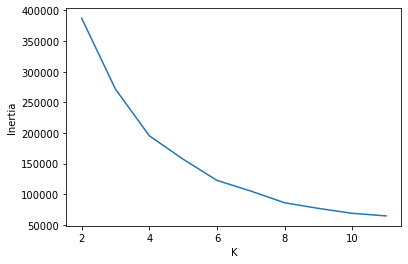

In [14]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df_dummies)
    inertias.append(k2.inertia_)

fig, ax= plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

Висновок: Оптимальна кількості кластерів = 4

#### Визначення моделі кластеризації KMeans та її навчання

In [15]:
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(df_dummies)

KMeans(n_clusters=4)

#### Центри кластерів

In [16]:
model_kmeans.cluster_centers_

array([[164.        ,  40.80555556,  87.91666667,  17.88888889,
          0.47222222,   0.52777778],
       [ 30.06779661,  36.10169492,  29.86440678,  49.86440678,
          0.62711864,   0.37288136],
       [ 92.48484848,  43.87878788,  57.72727273,  49.25757576,
          0.56060606,   0.43939394],
       [162.        ,  32.69230769,  86.53846154,  82.12820513,
          0.53846154,   0.46153846]])

#### Значення інерції

In [17]:
model_kmeans.inertia_

195449.9172757561

In [18]:
d = model_kmeans.labels_
d

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [19]:
df_labels = pd.DataFrame(data=d, columns = ["Label"])

df_labels

,Label
0,1
1,1
2,1
3,1
4,1
...,...
195,3
196,0
197,3
198,0


In [20]:
df_dummies = pd.concat([df_dummies, df_labels], axis = 1)

In [26]:
df_dummies

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male,Label
0,1,19,15,39,0,1,1
1,2,21,15,81,0,1,1
2,3,20,16,6,1,0,1
3,4,23,16,77,1,0,1
4,5,31,17,40,1,0,1
...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,3
196,197,45,126,28,1,0,0
197,198,32,126,74,0,1,3
198,199,32,137,18,0,1,0


In [22]:
df_dummies[df_dummies['Label'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,59.0,30.067797,17.295469,1.0,15.5,30.0,44.5,62.0
Age,59.0,36.101695,13.731031,18.0,24.0,33.0,48.5,67.0
Annual Income (k$),59.0,29.864407,9.685499,15.0,20.0,29.0,39.0,46.0
Spending Score (1-100),59.0,49.864407,27.887371,3.0,30.0,51.0,73.0,99.0
Female,59.0,0.627119,0.487722,0.0,0.0,1.0,1.0,1.0
Male,59.0,0.372881,0.487722,0.0,0.0,0.0,1.0,1.0
Label,59.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [23]:
df_dummies[df_dummies['Label'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,36.0,164.000000,21.071308,129.0,146.5,164.0,181.50,199.0
Age,36.0,40.805556,11.305674,19.0,34.0,41.5,47.25,59.0
Annual Income (k$),36.0,87.916667,16.231143,71.0,77.0,83.0,97.25,137.0
Spending Score (1-100),36.0,17.888889,10.708549,1.0,10.0,16.0,24.50,40.0
Female,36.0,0.472222,0.506309,0.0,0.0,0.0,1.00,1.0
Male,36.0,0.527778,0.506309,0.0,0.0,1.0,1.00,1.0
Label,36.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [24]:
df_dummies[df_dummies['Label'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,66.0,92.484848,19.379007,58.0,76.25,92.5,108.75,127.0
Age,66.0,43.878788,17.170202,18.0,26.25,47.0,58.50,70.0
Annual Income (k$),66.0,57.727273,6.929414,44.0,54.00,59.5,63.00,71.0
Spending Score (1-100),66.0,49.257576,6.615391,29.0,44.50,49.0,55.00,60.0
Female,66.0,0.560606,0.500117,0.0,0.00,1.0,1.00,1.0
Male,66.0,0.439394,0.500117,0.0,0.00,0.0,1.00,1.0
Label,66.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0


In [25]:
df_dummies[df_dummies['Label'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,39.0,162.000000,22.803509,124.0,143.0,162.0,181.0,200.0
Age,39.0,32.692308,3.728650,27.0,30.0,32.0,35.5,40.0
Annual Income (k$),39.0,86.538462,16.312485,69.0,75.5,79.0,95.0,137.0
Spending Score (1-100),39.0,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0
Female,39.0,0.538462,0.505035,0.0,0.0,1.0,1.0,1.0
Male,39.0,0.461538,0.505035,0.0,0.0,0.0,1.0,1.0
Label,39.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


#### Опис загальний характеристик цільових груп, визначених на підставі кластерів:

Група 1 (Label = 3):  Кількість людей = 39. Середній річний дохід по групі становить - 86.5 (k$). Середній вік - 32-33 р. Середній рейтинг покупців - 82 (min - 63.0, max - 97.0)

Група 2 (Label = 2):  Кількість людей = 66. Середній річний дохід по групі становить - 57.7 (k$). Середній вік - 43-44 р. Середній рейтинг покупців - 49 (min - 29.0, max - 60.0)

Група 3 (Label = 1):  Кількість людей = 59. Середній річний дохід по групі становить - 29.9 (k$). Середній вік - 36 р. Середній рейтинг покупців - 49 (min - 3.0, max - 99.0)

Група 4 (Label = 0):  Кількість людей = 36. Середній річний дохід по групі становить - 87.9 (k$). Середній вік - 40 - 41 р. Середній рейтинг покупців - 17 (min - 1.0, max - 40.0)

#### Висновки:
1) Клієнти Групи 4 потребують найбільшої уваги з точки зору маркетингу. Ця група має найменший середній рейтинг покупців - 17. В той же час, ознакою великого потенціалу є середній річний дохід по групі, що становить 87.9(k$). Маркетингові заходи по Групі 4 мають бути направлені на збільшення лояльності клієнтів та збільшення середнього чеку по групі за рахунок продажу дорогих товарі, що очевидно повинно збільшити середній рейтинг покупців Групи 4.

2) Група 2 порівняно з іншими групами має найбільшу кількість покупців, середній дохід яких є значно меншим за Групу 4. Маркетингові заходи по Групі 2 повинні бути направлені на збільшення середнього чеку за рахунок збільшення кількісних показників продажів. Для цього потрібні дискаунтні акції, розпродажі та впровадження програм лояльності.

3) Клієнти Група 1 - це найбільш лояльні клієнти з середній рейтинг покупців - 82, та великим середнім річним доходом - 86.5 (k$). До клієнтів цієї групи повинна бути прикута найбільша увага з точки зору підтримання лояльності. В першу чергу повинно бути забезпечено найвищий рівень обслуговування та релевантні пропозиції товарів. Треба "вгадувати" побажання клієнта, та забезпечити йому комфортне витрачання грошей.

4) Клієнт Групи 3 мають найнижчий потенціал, за рахунок найнижчого рівня середнього річного доходу - 29.9 (k$), але при цьому мають середній рейтинг покупців - 49. Це група з найбільшим розмахом рейтингу покупців 96 (min - 3.0, max - 99.0). Маркетингові заходи по Групі 3 мають бути направлені на збільшення продажів за рахунок товарі нижчого цінового сегменту
